# K-MEANS

### ¿Are there any groups?
### ¿Different stages of cancer? ¿Different types of breast cancer?

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py 
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Preparing the data

In [18]:
df = pd.read_csv("data.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)

In [20]:
#Divide the dataset in target and all the other features

df_nt= df.iloc[:,1:32]
df_t=df.iloc[:,0]


### Scaling the data

In [21]:
from sklearn import preprocessing


scaler = preprocessing.MinMaxScaler()
df= scaler.fit_transform(df_nt)
scaled_df = pd.DataFrame(df, columns=df_nt.columns)
print(scaled_df)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  sym

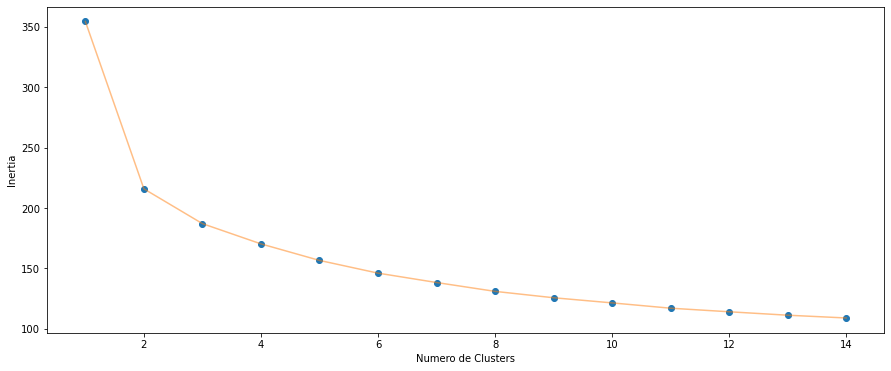

In [22]:
X1 = scaled_df.iloc[: , :].values

inertia = [] 
for n in range(1 , 15):
    grupos = KMeans(n_clusters = n ,init='k-means++', n_init = 20  ,max_iter=300, 
                        tol=0.0001,  random_state= 121  , algorithm='elkan') 
    grupos.fit(X1)
    inertia.append(grupos.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters') , plt.ylabel('Inertia')
plt.show()
    

## K = 3

In [23]:
kmeans = KMeans(n_clusters = 3 ,init='k-means++', n_init = 20  ,max_iter=300, 
                        tol=0.0001,  random_state= 121  , algorithm='elkan').fit(X1)

In [26]:
y_kmeans = kmeans.fit_predict(X1)

#Cluster column
scaled_df['cluster'] = pd.DataFrame(y_kmeans)
scaled_df.head()


#Target column
concatenated_df = pd.concat([scaled_df, df_t], axis=1)

concatenated_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,2,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1,M
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1,M
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1,M
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1,M


### Analyzing cluster size

In [27]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 112, 2: 96, 0: 361})

## Is there any cluster with only malignous cancer?

In [29]:
dataframes = {}

grupos = concatenated_df.groupby('cluster')
for nombres, grupo in grupos:
    dataframes[nombres] = pd.DataFrame(grupo)

cluster0 = dataframes[0]
cluster1 = dataframes[1]
cluster2 = dataframes[2]


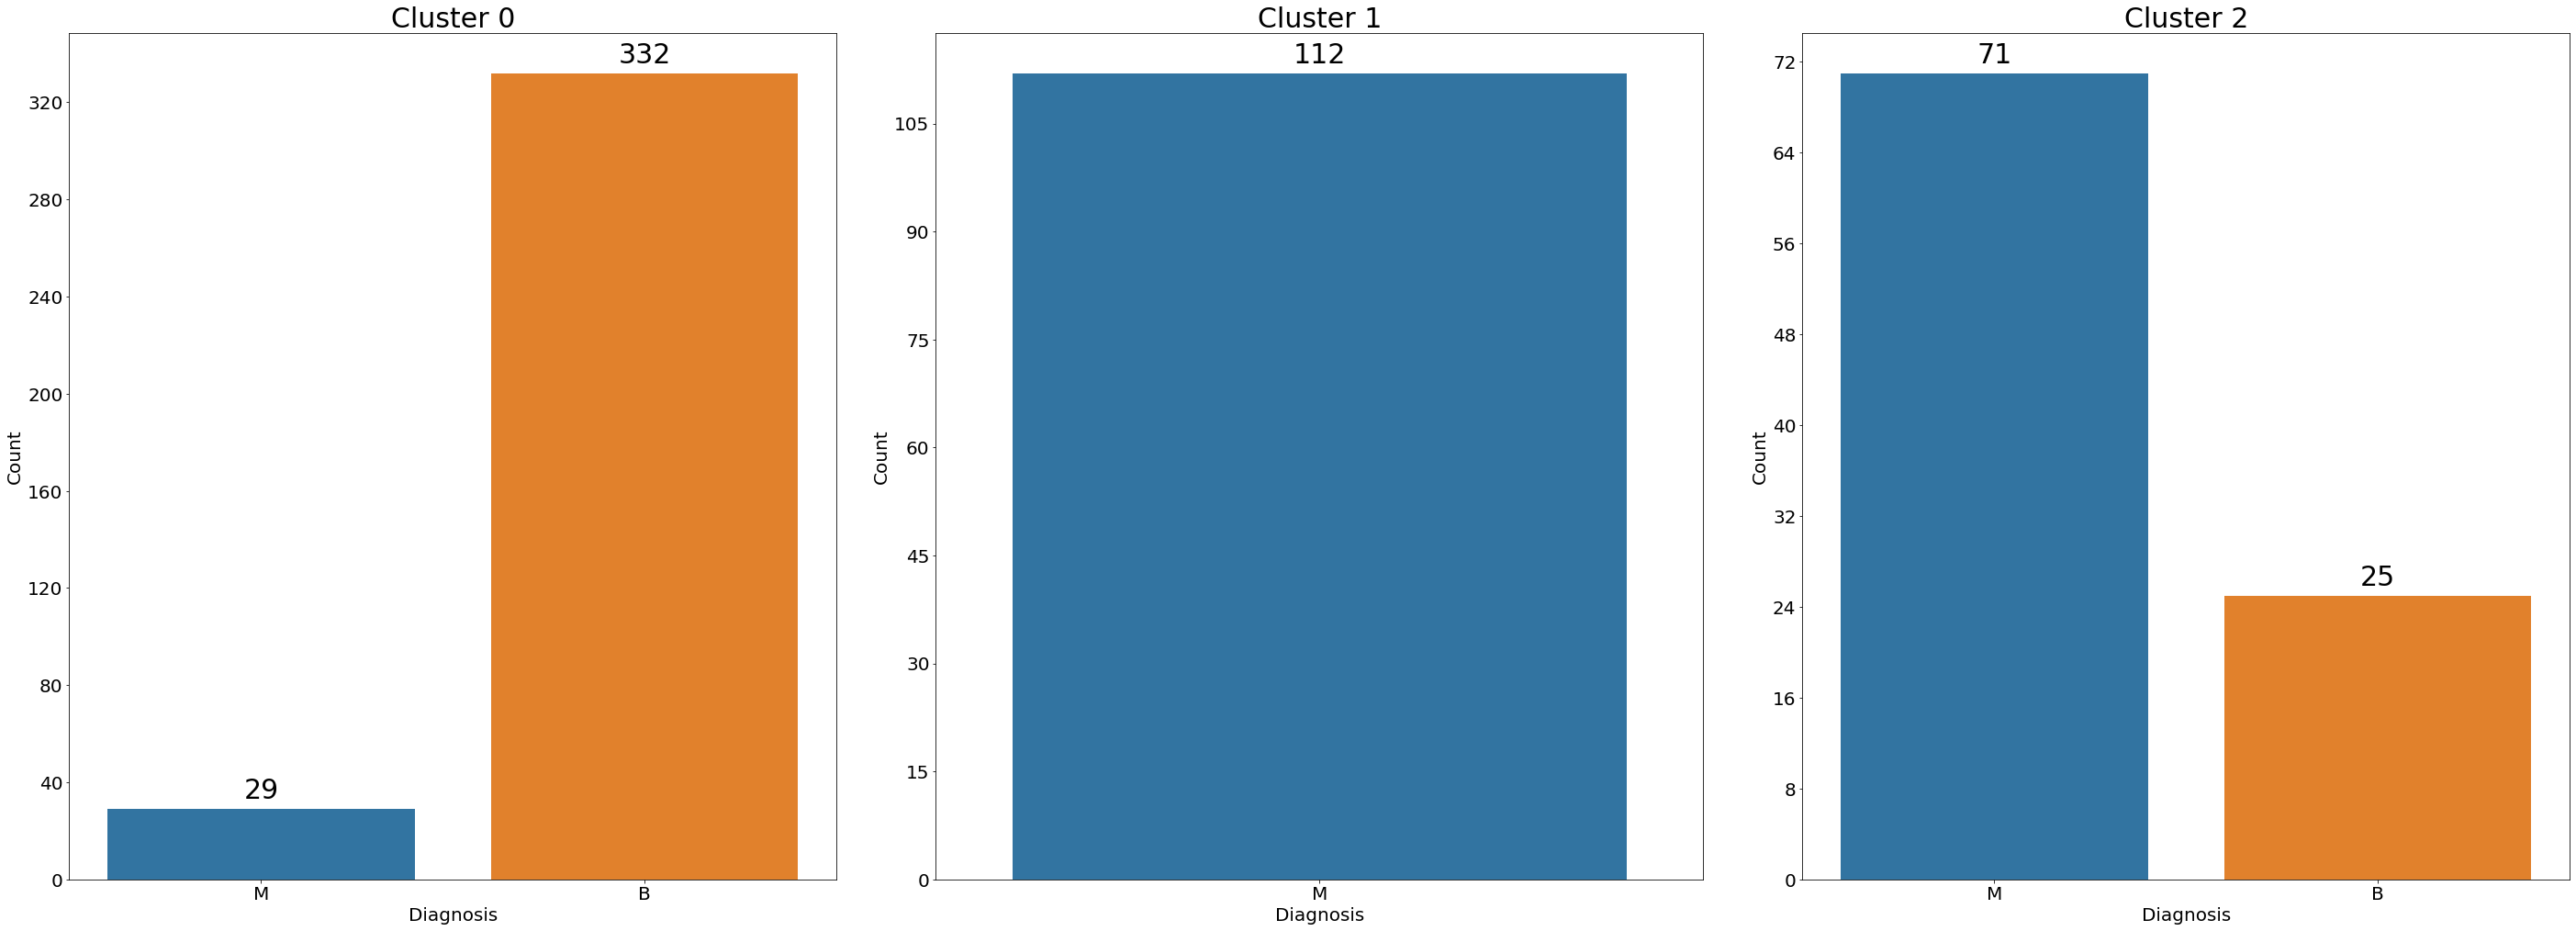

In [30]:
from matplotlib.ticker import MaxNLocator

plt.figure(1, figsize=(40, 15))

n = 0
m = 0 
for x in [cluster0,cluster1,cluster2]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=4, wspace=4)
    plt.tight_layout(pad=4)
    ax = sns.countplot(x="diagnosis", data=x)
    plt.title('Cluster {}'.format(m), fontsize=30)
    m += 1
    ax.tick_params(labelsize=20)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=30, color='black')
    

    plt.xlabel("Diagnosis", fontsize=20)  
    plt.ylabel("Count", fontsize=20) 
    
plt.show()

Cluster 1 consist of 112 malignous cancer. Lets analyze how the centroids of different cluster differs one another


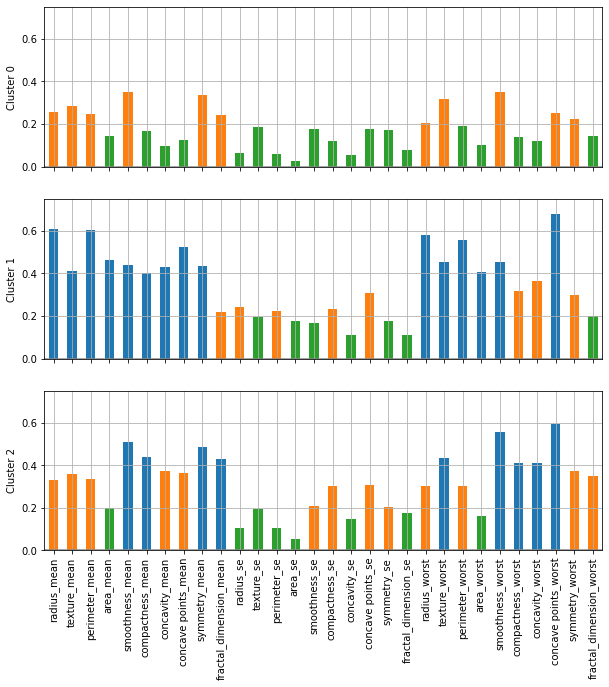

In [62]:
#Eliminate cluster column for the graph
df1 = scaled_df.drop("cluster", axis=1)


centers = pd.DataFrame(centroids1, columns=df1.columns)

f, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 0.75  
    colors = ["C0" if l > 0.4 else "C1" if l <= 0.4 and l > 0.2 else "C2" for l in center] 
    ax.axhline(color="#888888")
    center.plot.bar(ax=ax, color=colors)
    ax.grid(True)  # Add grid lines
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(0, maxPC)
    

Blue: coordinate > 0.4

Orange: 0.4 > coordinate > 0.2

Yellow: 0.2> coordinate



It is well-established in the field that as the disease progresses, there is a gradual alteration in nuclear parameters from benign to malignant, and this analysis demonstrates that nucleus size-related parameters such as radius, perimeter, and area play a crucial role in distinguishing malignant tumors. Additionally, the higher texture values observed in Cluster 1 indicate that the contrast of the nucleous is high, suggesting potential alterations in DNA compactness and chromatin organization.

Furthermore, all samples assigned to Cluster 1 in this dataset exhibit the largest nucleus sizes and the highest standard errors (SE) for each measurement. This suggests that the size and variability of the nucleus, along with the elevated texture values, play a crucial role in distinguishing malignant tumors in this dataset.

Moreover, Cluster 1 demonstrates elevated values for the features "convacity_mean" and "concave points_mean," indicating an increased convexity and a greater number of concave points in the tumor cell's nucleous. This, combined with the larger nucleus sizes, significant standard errors, and high texture values, characterizes Cluster 1 as a subgroup of malignancies with distinct features.

In summary, Cluster 1 represents a subgroup of malignancies characterized by larger nucleus sizes, significant standard errors, elevated values of "convacity_mean" and "concave points_mean," and higher texture values. These findings contribute to our understanding of the progressive changes in nuclear parameters associated with the transition from benign to malignant breast tumors. The high contrast observed in the nucleous suggests alterations in DNA compactness, potentially leading to different expression patterns in cells.